# <font color = red >**RAWRR** </font>

## DEMOGRAPHICS OF THE DATASET

In [ ]:
#@title Mount Drive
from google.colab import drive

In [ ]:
#@title Load Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#@title to upload files in G_COLAB
from google.colab import files

uploaded = files.upload()

Saving df_copy_with_index.xlsx to df_copy_with_index.xlsx


In [ ]:
#@title read data

df = pd.read_excel('/content/df_copy_with_index.xlsx')
df.head()

,Unnamed: 0,SENTENCE,POKUS NG PANDIWA,count,label,Modified_Entities,Modified_Sentence,Modified_Unique_Entities,Pandiwa_Entities,Unique_Pandiwa_Entities,Tagged_Modified_Sentence
0,0,Si Maria ay nagluto ng masarap na adobo.,POKUS SA TAGAGANAP,8,0,"[{'Entity': 'DTP', 'Word': 'si'}, {'Entity': '...",si maria ay nagluto ng masarap na adobo .,"[{'Entity': 'DTP', 'Word': 'si'}, {'Entity': '...","[{'Entity': 'VBTR', 'Word': 'nagluto'}]","[{'Entity': 'VBTR', 'Word': 'nagluto'}]",si maria ay PANDIWA: nagluto ng masarap na ado...
1,1,Kumanta si John sa kasal kahapon.,POKUS SA TAGAGANAP,6,0,"[{'Entity': 'VBAF', 'Word': 'kumanta'}, {'Enti...",kumanta si john sa kasal kahapon .,"[{'Entity': 'VBAF', 'Word': 'kumanta'}, {'Enti...","[{'Entity': 'VBAF', 'Word': 'kumanta'}]","[{'Entity': 'VBAF', 'Word': 'kumanta'}]",PANDIWA: kumanta si john sa kasal kahapon .
2,2,Siya ang nagwagi sa patimpalak na iyon.,POKUS SA TAGAGANAP,7,0,"[{'Entity': 'PRS', 'Word': 'siya'}, {'Entity':...",siya ang nagwagi sa patimpalak na iyon .,"[{'Entity': 'PRS', 'Word': 'siya'}, {'Entity':...","[{'Entity': 'VBTS', 'Word': 'nagwagi'}]","[{'Entity': 'VBTS', 'Word': 'nagwagi'}]",siya ang PANDIWA: nagwagi sa patimpalak na iyon .
3,3,Ang aking kapatid ay nag-aral nang mabuti para...,POKUS SA TAGAGANAP,10,0,"[{'Entity': 'DTC', 'Word': 'ang'}, {'Entity': ...",ang aking kapatid ay nag-aral nang mabuti para...,"[{'Entity': 'DTC', 'Word': 'ang'}, {'Entity': ...","[{'Entity': 'VBTS_CCB_VBW', 'Word': 'nag-aral'}]","[{'Entity': 'VBTS', 'Word': 'nag-aral'}, {'Ent...",ang aking kapatid ay PANDIWA: nag-aral nang ma...
4,4,Naglakad siya sa ilalim ng ulan.,POKUS SA TAGAGANAP,6,0,"[{'Entity': 'VBTS', 'Word': 'naglakad'}, {'Ent...",naglakad siya sa ilalim ng ulan .,"[{'Entity': 'VBTS', 'Word': 'naglakad'}, {'Ent...","[{'Entity': 'VBTS', 'Word': 'naglakad'}]","[{'Entity': 'VBTS', 'Word': 'naglakad'}]",PANDIWA: naglakad siya sa ilalim ng ulan .


In [ ]:
df.shape

(94526, 11)

In [ ]:
%%capture
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizer
from transformers import DistilBertForSequenceClassification
from transformers import TextClassificationPipeline

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from transformers import DistilBertTokenizer

#@title Load and preprocess data
tokenizer = DistilBertTokenizer.from_pretrained("jcblaise/distilbert-tagalog-base-cased")

# Define a function to tokenize and lowercase the sentences
def tokenize_and_lowercase(text):
    text = text.lower()  # Convert the text to lowercase
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return tokens

# Apply the tokenize_and_lowercase function to sentences
tokenized = df["SENTENCE"].apply(tokenize_and_lowercase)

max_len = max(map(len, tokenized))
padded = torch.tensor([i + [0] * (max_len - len(i)) for i in tokenized])


tokenizer_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/256k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

In [ ]:
# Define a function to tokenize and lowercase the sentences
def tokenize_and_lowercase(text):
    text = text.lower()  # Convert the text to lowercase
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return text

In [ ]:
# Apply the tokenize_and_lowercase function to your sentences
lowercase_texts = df["SENTENCE"].apply(tokenize_and_lowercase)

# Print the lowercase texts
for text in lowercase_texts [:10]:
    print(text)

si maria ay nagluto ng masarap na adobo.
kumanta si john sa kasal kahapon.
siya ang nagwagi sa patimpalak na iyon.
ang aking kapatid ay nag-aral nang mabuti para sa eksamen.
naglakad siya sa ilalim ng ulan.
magaling mag-basketball si michael.
sumayaw si sarah sa entablado.
inawit niya ang kanyang paboritong kanta.
si ben ang pumutol ng puno sa bakuran.
maglalaba si lola mamayang hapon.


In [ ]:
tokenized

0        [101, 126, 12496, 296, 118, 14430, 20286, 104,...
1        [101, 6114, 9632, 296, 126, 3062, 154, 140, 10...
2        [101, 411, 105, 14430, 2476, 13757, 107, 643, ...
3        [101, 105, 16515, 19943, 118, 14430, 30031, 74...
4        [101, 14430, 13836, 411, 107, 2575, 104, 854, ...
                               ...                        
94521    [101, 14430, 30031, 6799, 105, 11167, 1958, 10...
94522    [101, 9734, 6125, 296, 105, 17866, 962, 16589,...
94523    [101, 14430, 30031, 4987, 105, 30015, 268, 316...
94524    [101, 13255, 9130, 1846, 105, 30015, 268, 6345...
94525    [101, 14430, 30031, 6799, 105, 1611, 3822, 107...
Name: SENTENCE, Length: 94526, dtype: object

In [ ]:
padded

tensor([[  101,   126, 12496,  ...,     0,     0,     0],
        [  101,  6114,  9632,  ...,     0,     0,     0],
        [  101,   411,   105,  ...,     0,     0,     0],
        ...,
        [  101, 14430, 30031,  ...,     0,     0,     0],
        [  101, 13255,  9130,  ...,     0,     0,     0],
        [  101, 14430, 30031,  ...,     0,     0,     0]])

In [ ]:
#@title Encode labels as integers
label_to_index = {
    "POKUS SA TAGAGANAP": 0,
    "POKUS SA LAYON": 1,
    "POKUS SA GANAPAN": 2,
    "POKUS SA TAGATANGGAP": 3,
    "POKUS SA KAGAMITAN": 4,
    "POKUS SA SANHI": 5,
    "POKUS SA DIREKSYON": 6
}

df["label"] = df["POKUS NG PANDIWA"].map(label_to_index)

In [ ]:
df.head()

,Unnamed: 0,SENTENCE,POKUS NG PANDIWA,count,label,Modified_Entities,Modified_Sentence,Modified_Unique_Entities,Pandiwa_Entities,Unique_Pandiwa_Entities,Tagged_Modified_Sentence
0,0,Si Maria ay nagluto ng masarap na adobo.,POKUS SA TAGAGANAP,8,0,"[{'Entity': 'DTP', 'Word': 'si'}, {'Entity': '...",si maria ay nagluto ng masarap na adobo .,"[{'Entity': 'DTP', 'Word': 'si'}, {'Entity': '...","[{'Entity': 'VBTR', 'Word': 'nagluto'}]","[{'Entity': 'VBTR', 'Word': 'nagluto'}]",si maria ay PANDIWA: nagluto ng masarap na ado...
1,1,Kumanta si John sa kasal kahapon.,POKUS SA TAGAGANAP,6,0,"[{'Entity': 'VBAF', 'Word': 'kumanta'}, {'Enti...",kumanta si john sa kasal kahapon .,"[{'Entity': 'VBAF', 'Word': 'kumanta'}, {'Enti...","[{'Entity': 'VBAF', 'Word': 'kumanta'}]","[{'Entity': 'VBAF', 'Word': 'kumanta'}]",PANDIWA: kumanta si john sa kasal kahapon .
2,2,Siya ang nagwagi sa patimpalak na iyon.,POKUS SA TAGAGANAP,7,0,"[{'Entity': 'PRS', 'Word': 'siya'}, {'Entity':...",siya ang nagwagi sa patimpalak na iyon .,"[{'Entity': 'PRS', 'Word': 'siya'}, {'Entity':...","[{'Entity': 'VBTS', 'Word': 'nagwagi'}]","[{'Entity': 'VBTS', 'Word': 'nagwagi'}]",siya ang PANDIWA: nagwagi sa patimpalak na iyon .
3,3,Ang aking kapatid ay nag-aral nang mabuti para...,POKUS SA TAGAGANAP,10,0,"[{'Entity': 'DTC', 'Word': 'ang'}, {'Entity': ...",ang aking kapatid ay nag-aral nang mabuti para...,"[{'Entity': 'DTC', 'Word': 'ang'}, {'Entity': ...","[{'Entity': 'VBTS_CCB_VBW', 'Word': 'nag-aral'}]","[{'Entity': 'VBTS', 'Word': 'nag-aral'}, {'Ent...",ang aking kapatid ay PANDIWA: nag-aral nang ma...
4,4,Naglakad siya sa ilalim ng ulan.,POKUS SA TAGAGANAP,6,0,"[{'Entity': 'VBTS', 'Word': 'naglakad'}, {'Ent...",naglakad siya sa ilalim ng ulan .,"[{'Entity': 'VBTS', 'Word': 'naglakad'}, {'Ent...","[{'Entity': 'VBTS', 'Word': 'naglakad'}]","[{'Entity': 'VBTS', 'Word': 'naglakad'}]",PANDIWA: naglakad siya sa ilalim ng ulan .


In [ ]:
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

In [ ]:
labels = torch.tensor(df["label"])
dataset = TensorDataset(padded, labels)

In [ ]:
labels

tensor([0, 0, 0,  ..., 6, 6, 6])

In [ ]:
padded

tensor([[  101,   126, 12496,  ...,     0,     0,     0],
        [  101,  6114,  9632,  ...,     0,     0,     0],
        [  101,   411,   105,  ...,     0,     0,     0],
        ...,
        [  101, 14430, 30031,  ...,     0,     0,     0],
        [  101, 13255,  9130,  ...,     0,     0,     0],
        [  101, 14430, 30031,  ...,     0,     0,     0]])

In [ ]:
dataset

## TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

#@title Define the proportions for training, validation, and test sets
train_size = 0.6  # 60% for training
val_size = 0.2    # 20% for validation
test_size = 0.2   # 20% for testing

# Split the data into training, validation, and test sets
train_dataset, temp_dataset = train_test_split(dataset, test_size=(1 - train_size), random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=(test_size / (test_size + val_size)), random_state=42)

# Print the sizes of the datasets
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))


Training dataset size: 56715
Validation dataset size: 18905
Test dataset size: 18906


## MODELING

In [ ]:
#@title Initialize the model
num_classes = 7  # Number of classes
model = DistilBertForSequenceClassification.from_pretrained("jcblaise/distilbert-tagalog-base-cased", num_labels=num_classes)

pytorch_model.bin:   0%|          | 0.00/267M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at jcblaise/distilbert-tagalog-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#@title Set up data loaders

# Define your batch size
batch_size = 64


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# ADDITIONAL IMPORT WILL COMPILE LATER
import numpy as np
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#@title Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []
test_losses = []

In [ ]:
#@title Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30101, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

## TRAINING THE MODEL

In [ ]:
epochs = 3  # Number of training epochs

In [ ]:
for epoch in range(epochs):
    # Training
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        train_loss = outputs.loss
        total_train_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()

    # Calculate the average training loss for this epoch
    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(average_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs, labels=labels)
            val_loss = outputs.loss
            total_val_loss += val_loss.item()

    # Calculate the average validation loss for this epoch
    average_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(average_val_loss)

    # Testing
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs, labels=labels)
            test_loss = outputs.loss
            total_test_loss += test_loss.item()

    # Calculate the average test loss for this epoch
    average_test_loss = total_test_loss / len(test_dataloader)
    test_losses.append(average_test_loss)

    # Print training, validation, and test loss for this epoch
    print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_val_loss:.4f} - Test Loss: {average_test_loss:.4f}")


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/3 - Training Loss: 0.7812 - Validation Loss: 0.5346 - Test Loss: 0.5268
Epoch 2/3 - Training Loss: 0.5019 - Validation Loss: 0.4727 - Test Loss: 0.4697
Epoch 3/3 - Training Loss: 0.4185 - Validation Loss: 0.4260 - Test Loss: 0.4172


## PLOT

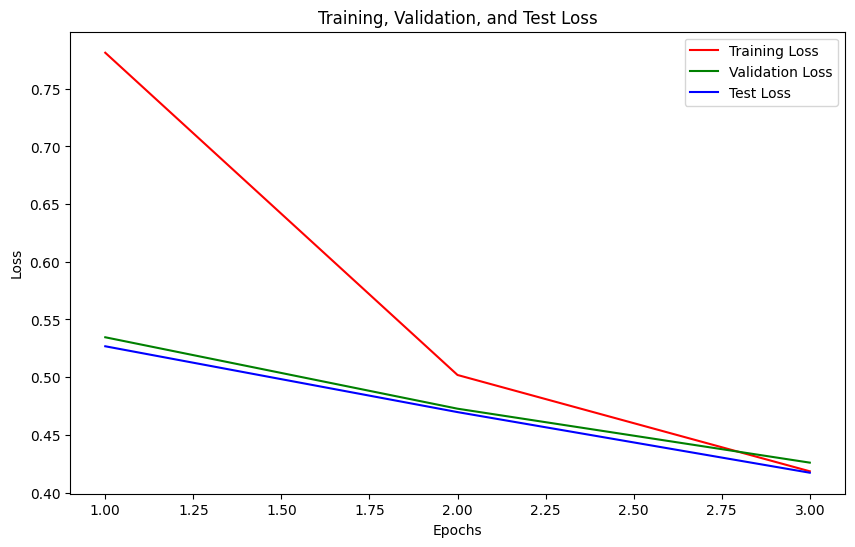

In [ ]:
#@title Plot training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color="r")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", color="g")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training, Validation, and Test Loss")
plt.legend()
plt.show()


The consistency between training, validation, and test losses suggests that the model has not overfit the training data and is likely to perform well on unseen data. However, it's important to remember that these results are just a part of the overall model evaluation, and other metrics and analysis should also be considered to assess the model's performance comprehensively.

## EVALUATION

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
model.eval()
all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs, labels=labels)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted_labels.cpu().numpy())

#@title Calculate and print classification report
classification_rep = classification_report(all_true_labels, all_predicted_labels, target_names=label_to_index.keys())
print(classification_rep)

                      precision    recall  f1-score   support

  POKUS SA TAGAGANAP       0.90      0.87      0.88      2713
      POKUS SA LAYON       0.75      0.71      0.73      2716
    POKUS SA GANAPAN       0.90      0.88      0.89      2616
POKUS SA TAGATANGGAP       0.74      0.93      0.83      2823
  POKUS SA KAGAMITAN       0.96      0.94      0.95      2306
      POKUS SA SANHI       0.96      0.91      0.93      2822
  POKUS SA DIREKSYON       0.80      0.76      0.77      2909

            accuracy                           0.85     18905
           macro avg       0.86      0.85      0.86     18905
        weighted avg       0.86      0.85      0.85     18905



In [ ]:
model.eval()
all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for batch in test_dataloader:  # Use the test dataloader here
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs, labels=labels)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted_labels.cpu().numpy())

#@title Calculate and print the classification report for the test dataset
classification_rep = classification_report(all_true_labels, all_predicted_labels, target_names=label_to_index.keys())
print(classification_rep)



                      precision    recall  f1-score   support

  POKUS SA TAGAGANAP       0.90      0.86      0.88      2741
      POKUS SA LAYON       0.76      0.72      0.74      2774
    POKUS SA GANAPAN       0.90      0.86      0.88      2574
POKUS SA TAGATANGGAP       0.77      0.93      0.84      2927
  POKUS SA KAGAMITAN       0.96      0.93      0.95      2255
      POKUS SA SANHI       0.96      0.91      0.93      2894
  POKUS SA DIREKSYON       0.77      0.77      0.77      2741

            accuracy                           0.85     18906
           macro avg       0.86      0.85      0.86     18906
        weighted avg       0.86      0.85      0.85     18906



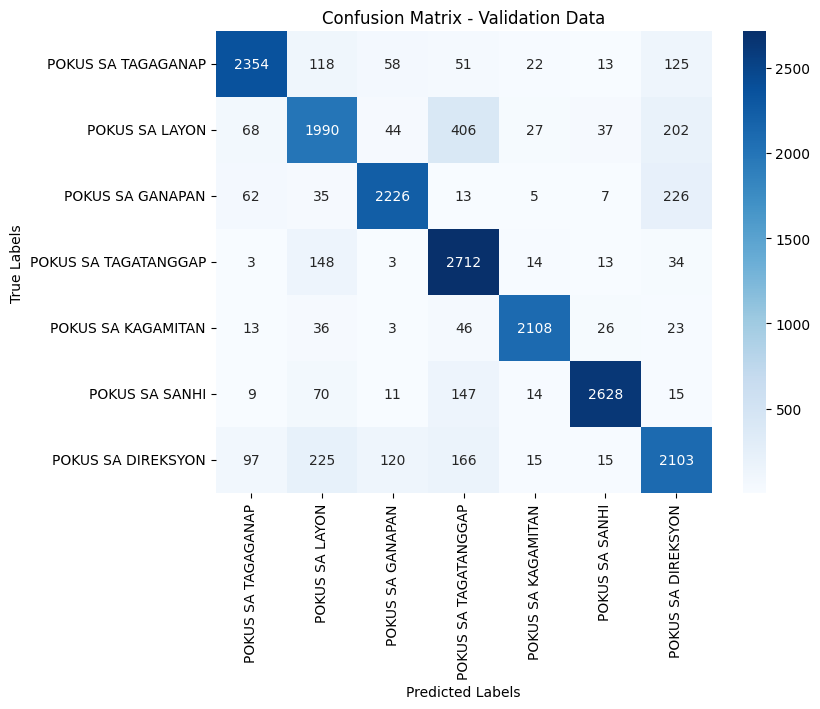

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#@title Calculate the confusion matrix for validation data
confusion_matrix_val = confusion_matrix(all_true_labels, all_predicted_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Data')
plt.show()




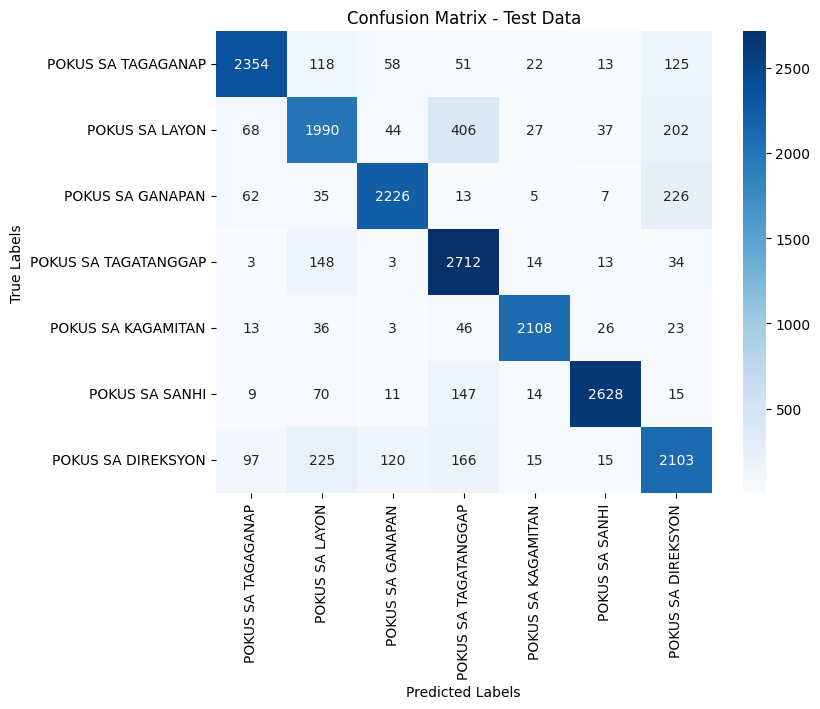

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#@title Calculate the confusion matrix for test data
confusion_matrix_test = confusion_matrix(all_true_labels, all_predicted_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')
plt.show()



In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'tokenizer': tokenizer,
    'label_mapping': label_to_index
}, 'PNPCHKR_DSTLBRT.pth')


In [ ]:
checkpoint = torch.load('/content/PNPCHKR_DSTLBRT.pth')
model.load_state_dict(checkpoint['model_state_dict'])
tokenizer = checkpoint['tokenizer']
label_to_index = checkpoint['label_mapping']

# Set the model to evaluation mode
model.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30101, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
new_sentence = "umuulan ng malakas dahil sa bagyo" #@param {type:"string"}
encoded_sentence = tokenizer(new_sentence, return_tensors='pt', padding=True, truncation=True)
input_ids = encoded_sentence['input_ids'].to(device)  # Send the input to the device (e.g., GPU)

with torch.no_grad():
    outputs = model(input_ids)
    predicted_label_id = torch.argmax(outputs.logits, dim=1).item()

# Convert the predicted label ID back to the label string
predicted_label = [label for label, index in label_to_index.items() if index == predicted_label_id][0]

print(f"Predicted Label: {predicted_label}")


Predicted Label: POKUS SA LAYON


test